# K-mean
* K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

* It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
* It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

* It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

* The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.


# Elbow Method
* The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms. But choosing the optimal number of clusters is a big task.
* Elbow method: This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. Here, you draw a curve between WSS (within sum of squares) and the number of clusters. It is called elbow method because the curve looks like a human arm and the elbow point gives us the optimum number of clusters. As you can see that after the elbow point, there is a very slow change in the value of WSS, so you should take the elbow point value as the final number of clusters.
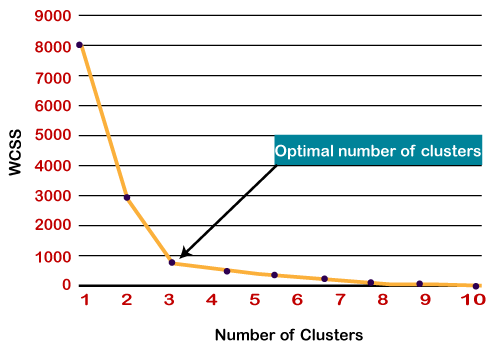


# Applications of K-Means Clustering
K-Means clustering is used in a variety of examples or business cases in real life, like:

**Academic Performance**

Based on the scores, students are categorized into grades like A, B, or C. 

**Diagnostic systems**

The medical profession uses k-means in creating smarter medical decision support systems, especially in the treatment of liver ailments.

**Search engines**

Clustering forms a backbone of search engines. When a search is performed, the search results need to be grouped, and the search engines very often use clustering to do this. 

**Wireless sensor networks**

The clustering algorithm plays the role of finding the cluster heads, which collect all the data in its respective cluster.

**kmeans algorithm is very popular and used in a variety of applications such as market segmentation, document clustering, image segmentation and image compression, etc. **

# K-mean from scratch

**Pseudocode**

Initialize k means with random values

For a given number of iterations:
    
    Iterate through items:
        Find the mean closest to the item
        Assign item to mean
        Update mean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
Iris=load_iris()
print(Iris.data.shape)
print(Iris.feature_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [344]:
df=pd.DataFrame(Iris.data)
df.shape

(150, 4)

In [345]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [347]:
df=df[[2,3]].rename(columns={2:'x',3:'y'})
df.shape

(150, 2)

In [353]:
# centroid (x,y)
k=2
centroids ={
    i:[np.random.randint(df['x'].min(), df['x'].max()),np.random.randint(df['y'].min(), df['y'].max())] for i in range(k)
}
print(centroids)

{0: [3, 1], 1: [5, 0]}


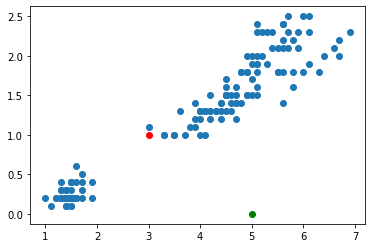

In [354]:
fig = plt.Figure(figsize=(5,5))
plt.scatter(df['x'],df['y'])
colmap={0:'r', 1:'g'}
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i])

In [355]:
def cluster(df, centroids):
    for i in centroids.keys():
        df["dist_{}".format(i)] = (np.sqrt((df['x']-centroids[i][0])**2 +(df['y']-centroids[i][1])**2)) 
    dist_cols = ['dist_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,dist_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x : int(x.lstrip('dist_')))
    df['color'] =  df['closest'].map(lambda x : colmap[x])
    print(df)
    return df
df =cluster(df, centroids)

       x    y    dist_0    dist_1  closest color
0    1.4  0.2  1.788854  3.605551        0     r
1    1.4  0.2  1.788854  3.605551        0     r
2    1.3  0.2  1.878829  3.705401        0     r
3    1.5  0.2  1.700000  3.505710        0     r
4    1.4  0.2  1.788854  3.605551        0     r
..   ...  ...       ...       ...      ...   ...
145  5.2  2.3  2.555386  2.308679        1     g
146  5.0  1.9  2.193171  1.900000        1     g
147  5.2  2.0  2.416609  2.009975        1     g
148  5.4  2.3  2.729469  2.334524        1     g
149  5.1  1.8  2.247221  1.802776        1     g

[150 rows x 6 columns]


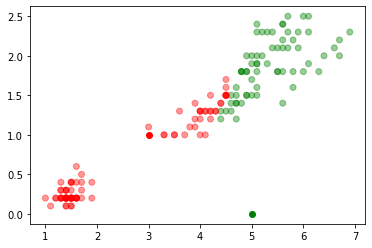

In [356]:
fig = plt.Figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'], alpha=0.4)
for i in centroids.keys():
    plt.scatter(*centroids[i], c=colmap[i])


{0: [2.505952380952381, 0.6630952380952381], 1: [5.351515151515153, 1.8818181818181814]}


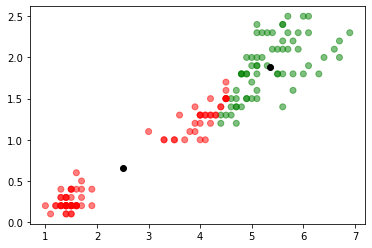

In [357]:
#updating the centroids
import copy
def update(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
    return centroids
centroids = update(centroids)
print(centroids)
fig = plt.Figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'], color=df['color'], alpha = 0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k')

       x    y    dist_0    dist_1  closest color
0    1.4  0.2  1.198995  4.294530        0     r
1    1.4  0.2  1.198995  4.294530        0     r
2    1.3  0.2  1.291812  4.386717        0     r
3    1.5  0.2  1.107428  4.202699        0     r
4    1.4  0.2  1.198995  4.294530        0     r
..   ...  ...       ...       ...      ...   ...
145  5.2  2.3  3.152356  0.444784        1     g
146  5.0  1.9  2.783919  0.351985        1     g
147  5.2  2.0  3.007525  0.192156        1     g
148  5.4  2.3  3.324901  0.420983        1     g
149  5.1  1.8  2.832249  0.264488        1     g

[150 rows x 6 columns]
{0: [2.505952380952381, 0.6630952380952381], 1: [5.351515151515153, 1.8818181818181814]}


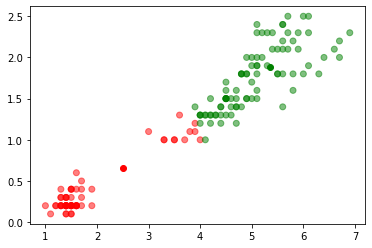

In [358]:
df = cluster(df, centroids)
print(centroids)
fig = plt.Figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'], alpha = 0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], c=colmap[i])


       x    y    dist_0    dist_1  closest color
0    1.4  0.2  0.486709  3.982766        0     r
1    1.4  0.2  0.486709  3.982766        0     r
2    1.3  0.2  0.579712  4.075062        0     r
3    1.5  0.2  0.397121  3.890850        0     r
4    1.4  0.2  0.486709  3.982766        0     r
..   ...  ...       ...       ...      ...   ...
145  5.2  2.3  3.857290  0.564946        1     g
146  5.0  1.9  3.494727  0.164406        1     g
147  5.2  2.0  3.718298  0.281960        1     g
148  5.4  2.3  4.032410  0.641676        1     g
149  5.1  1.8  3.544425  0.058600        1     g

[150 rows x 6 columns]
       x    y    dist_0    dist_1  closest color
0    1.4  0.2  0.184182  3.860368        0     r
1    1.4  0.2  0.184182  3.860368        0     r
2    1.3  0.2  0.275678  3.952745        0     r
3    1.5  0.2  0.108847  3.768380        0     r
4    1.4  0.2  0.184182  3.860368        0     r
..   ...  ...       ...       ...      ...   ...
145  5.2  2.3  4.157485  0.650508        1   

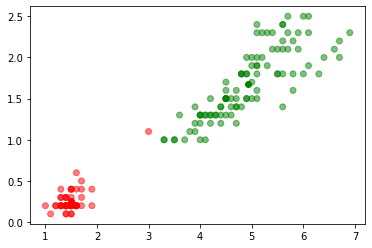

In [359]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = cluster(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.Figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'], color=df['color'], alpha = 0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], c=colmap[i])


In [360]:
print(centroids)

{0: [1.4921568627450983, 0.2627450980392156], 1: [4.925252525252526, 1.6818181818181823]}


# Using sklearn 

In [92]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame(Iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667


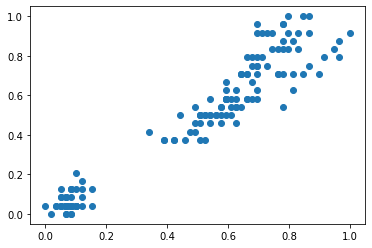

In [93]:
plt.scatter(df[2], df[3])

In [94]:
km = KMeans(n_clusters=3)
print(km)

KMeans(n_clusters=3)


In [95]:
y_predicted=km.fit_predict(df[[2,3]])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [96]:
df['cluster']=y_predicted
df.head()

,0,1,2,3,cluster
0,5.1,3.5,0.067797,0.041667,1
1,4.9,3.0,0.067797,0.041667,1
2,4.7,3.2,0.050847,0.041667,1
3,4.6,3.1,0.084746,0.041667,1
4,5.0,3.6,0.067797,0.041667,1


In [97]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

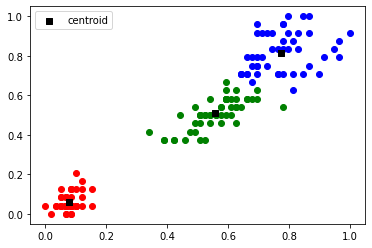

In [98]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1[2],df1[3], c='g')
plt.scatter(df2[2],df2[3], c='r')
plt.scatter(df3[2],df3[3], c='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='k', marker='s',label='centroid')
plt.legend()

In [99]:
print(km.inertia_)

1.701874688192097


In [100]:
k= range(1,10)
sse=[]
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(df[[2,3]])
    sse.append(km.inertia_)

C:\Users\nancy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [101]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6801035704886194,
 0.5663174952054537,
 0.48580845539143697,
 0.4366030461145208]

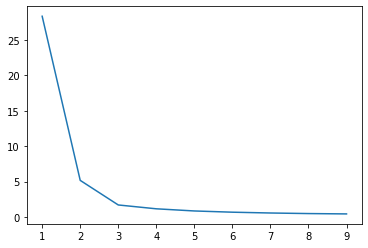

In [102]:
plt.plot(k,sse) # 3 is the optimal no. of clusters

In [103]:
# scaling the data
df= pd.DataFrame(Iris.data)
scaler = MinMaxScaler()
scaler.fit(df[[3]])
df[3] = scaler.transform(np.array(df[3]).reshape(-1,1))
scaler.fit(df[[2]])
df[2] = scaler.transform(np.array(df[2]).reshape(-1,1))
df

,0,1,2,3
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667
...,...,...,...,...
145,6.7,3.0,0.711864,0.916667
146,6.3,2.5,0.677966,0.750000
147,6.5,3.0,0.711864,0.791667
148,6.2,3.4,0.745763,0.916667


In [104]:
k= range(1,10)
sse=[]
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(df[[2,3]])
    sse.append(km.inertia_)

C:\Users\nancy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [105]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8535683225340074,
 0.6806539059219305,
 0.5651273455703979,
 0.4880262556573532,
 0.42544198335229505]

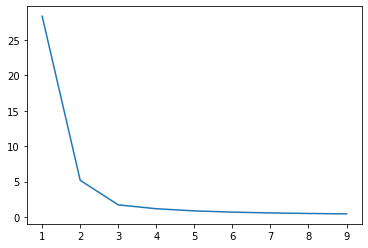

In [106]:
plt.plot(k,sse)